In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from math import ceil

In [2]:
oct18 = pd.read_csv("MAPDATACSV/2018_OCTOBER.csv")
nov18 = pd.read_csv("MAPDATACSV/2018_NOVEMBER.csv")
dec18 = pd.read_csv("MAPDATACSV/2018_DECEMBER.csv")

jan19 = pd.read_csv("MAPDATACSV/2019_JANUARY.csv")
feb19 = pd.read_csv("MAPDATACSV/2019_FEBRUARY.csv")
mar19 = pd.read_csv("MAPDATACSV/2019_MARCH.csv")
apr19 = pd.read_csv("MAPDATACSV/2019_APRIL.csv")
may19 = pd.read_csv("MAPDATACSV/2019_MAY.csv")
jun19 = pd.read_csv("MAPDATACSV/2019_JUNE.csv")
jul19 = pd.read_csv("MAPDATACSV/2019_JULY.csv")
aug19 = pd.read_csv("MAPDATACSV/2019_AUGUST.csv")
sep19 = pd.read_csv("MAPDATACSV/2019_SEPTEMBER.csv")
oct19 = pd.read_csv("MAPDATACSV/2019_OCTOBER.csv")
nov19 = pd.read_csv("MAPDATACSV/2019_NOVEMBER.csv")
dec19 = pd.read_csv("MAPDATACSV/2019_DECEMBER.csv")

jan20 = pd.read_csv("MAPDATACSV/2020_JANUARY.csv")
feb20 = pd.read_csv("MAPDATACSV/2020_FEBRUARY.csv")
mar20 = pd.read_csv("MAPDATACSV/2020_MARCH.csv")
may20 = pd.read_csv("MAPDATACSV/2020_MAY.csv")
jun20 = pd.read_csv("MAPDATACSV/2020_JUNE.csv")
jul20 = pd.read_csv("MAPDATACSV/2020_JULY.csv")
aug20 = pd.read_csv("MAPDATACSV/2020_AUGUST.csv")
sep20 = pd.read_csv("MAPDATACSV/2020_SEPTEMBER.csv")
oct20 = pd.read_csv("MAPDATACSV/2020_OCTOBER.csv")
nov20 = pd.read_csv("MAPDATACSV/2020_NOVEMBER.csv")
dec20 = pd.read_csv("MAPDATACSV/2020_DECEMBER.csv")

jan21 = pd.read_csv("MAPDATACSV/2021_JANUARY.csv")
feb21 = pd.read_csv("MAPDATACSV/2021_FEBRUARY.csv")
mar21 = pd.read_csv("MAPDATACSV/2021_MARCH.csv")
apr21 = pd.read_csv("MAPDATACSV/2021_APRIL.csv")
may21 = pd.read_csv("MAPDATACSV/2021_MAY.csv")
jun21 = pd.read_csv("MAPDATACSV/2021_JUNE.csv")
jul21 = pd.read_csv("MAPDATACSV/2021_JULY.csv")
aug21 = pd.read_csv("MAPDATACSV/2021_AUGUST.csv")
sep21 = pd.read_csv("MAPDATACSV/2021_SEPTEMBER.csv")

all_dates = [oct18,nov18,dec18,jan19,feb19,mar19,apr19,may19,jun19,jul19,aug19,sep19,oct19,nov19,dec19,jan20,feb20,mar20,may20,jun20,jul20,aug20,sep20,oct20,nov20,dec20,jan21,feb21,mar21,apr21,may21,jun21,jul21,aug21,sep21]


In [3]:
full_data = pd.concat(all_dates, sort=False)

In [4]:
map_data = pd.DataFrame()

map_data['lat'] = full_data['timelineObjects/activitySegment/startLocation/latitudeE7'].shift(-1)
map_data['lon'] = full_data['timelineObjects/activitySegment/startLocation/longitudeE7'].shift(-1)
map_data['start_date'] = full_data['timelineObjects/placeVisit/duration/startTimestampMs']
map_data['end_date'] = full_data['timelineObjects/placeVisit/duration/endTimestampMs']
map_data['name'] = full_data['timelineObjects/placeVisit/location/name']

map_data = map_data.dropna(axis=0)
map_data['lat'] = map_data['lat']*0.0000001
map_data['lon'] = map_data['lon']*0.0000001

In [5]:
map_data['start_date'] = pd.to_datetime(map_data['start_date'], unit='ms')
map_data['end_date'] = pd.to_datetime(map_data['end_date'], unit='ms')

In [6]:
def get_dom(dt):
    return dt.day 

def get_weekday(dt):
    return dt.weekday()

def get_hour(dt):
    return dt.hour 

def count_rows(rows): 
    return len(rows)

map_data['start_dom'] = map_data['start_date'].map(get_dom)
map_data['start_weekday']= map_data['start_date'].map(get_weekday)
map_data['end_dom'] = map_data['end_date'].map(get_dom)
map_data['end_weekday']= map_data['end_date'].map(get_weekday)
map_data['start_hour'] = map_data['start_date'].map(get_hour)
map_data['end_hour']= map_data['end_date'].map(get_hour)

In [7]:
map_data

,lat,lon,start_date,end_date,name,start_dom,start_weekday,end_dom,end_weekday,start_hour,end_hour
0,48.846313,2.384519,2018-10-05 16:37:00.635000064,2018-10-06 05:41:16.944999936,15 Rue Erard,5,4,6,5,16,5
2,48.789326,2.363715,2018-10-06 06:41:41.376999936,2018-10-06 10:52:03.999000064,Efrei Paris,6,5,6,5,6,10
6,48.846127,2.385124,2018-10-06 15:59:20.374000128,2018-10-08 04:47:38.392000000,15 Rue Erard,6,5,8,0,15,4
8,48.790597,2.369065,2018-10-08 07:58:23.584000000,2018-10-08 10:03:49.000000000,Efrei Paris,8,0,8,0,7,10
10,48.793894,2.368809,2018-10-08 10:07:21.999000064,2018-10-08 10:38:31.999000064,O'Tacos Villejuif,8,0,8,0,10,10
...,...,...,...,...,...,...,...,...,...,...,...
11,48.847079,2.385343,2021-09-02 21:11:38.163000064,2021-09-03 18:52:42.180999936,15 Rue Erard,2,3,3,4,21,18
13,48.846803,2.387324,2021-09-03 18:55:02.263000064,2021-09-03 19:01:50.358000128,Lidl,3,4,3,4,18,19
15,48.856912,2.348550,2021-09-03 19:17:51.375000064,2021-09-03 22:09:12.019000064,Paris Plages,3,4,3,4,19,22
18,48.854006,2.371050,2021-09-03 22:47:13.500000000,2021-09-03 23:52:57.012000000,Treplay Club Paris,3,4,3,4,22,23


In [17]:
 map_data.to_csv('map_data.csv', index=False) 

c:\users\utilisateur\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128138 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\utilisateur\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128138 missing from current font.
  font.set_text(s, 0, flags=flags)


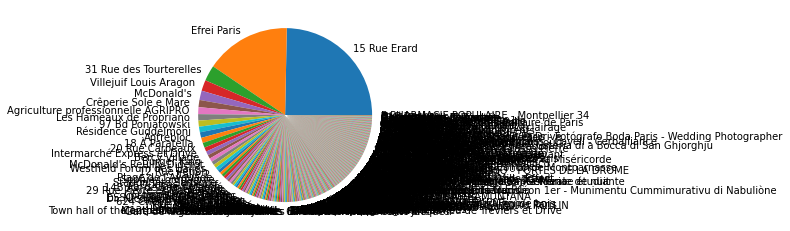

In [15]:
places = map_data.groupby(['name']).apply(count_rows)
places = places.sort_values(ascending=False)
places = places.to_frame()

p = places
p[5] 

plt.pie(places[0], labels=places.index)
plt.show() 

In [29]:
places.to

,0
name,
15 Rue Erard,500
Efrei Paris,321
31 Rue des Tourterelles,59
Villejuif Louis Aragon,41
McDonald's,35
...,...
Gara stradali di Pruprià,1
Gap,1
GLS Beaune,1


In [34]:
p = pd.DataFrame()

p['name'] = places.index
p['freq'] = places
p

KeyError: '0'